In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import datetime 
import warnings
import sys
from datetime import timedelta
warnings.simplefilter(action='ignore', category=FutureWarning)

# from ClassFunctions_OtherRes import precip_time_series, rainfall_analysis
from PlottingFunctions import *

# For each file which has a 5 minute pickle file
for pickle_str in os.listdir(f'/nfs/a319/gy17m2a/MetricEvaluation/DanishRainDataPickles/')[66:67]:
    
    if 'svk' in pickle_str:
        directory = 'DanishRainData_SVK'
    else:
        directory = 'DanishRainData'    
    
    if 'svk' not in pickle_str:
    
        all_events = []

        file_name = pickle_str.split('.pkl')[0]
        if os.path.isfile(f"/nfs/a319/gy17m2a/MetricEvaluation/DanishRainData_Outputs/{temp_res}mins/All_events_new_{file_name}"):
            print("is file")
        else:
            print("is not file")

In [2]:
temp_res = 30

In [3]:
all_events_5mins =[]
all_events_30mins =[]

for num, file in enumerate(os.listdir("../DanishRainData_Outputs/5mins/")):
    # Get 5 mintue data
    df_5mins = pd.read_csv(f"../DanishRainData_Outputs/5mins/{file}")
    # df_5mins['event_num']=range(0, len(df))
    df_5mins['event_num']=df_5mins.index
    # Get 30 minute data
    df_30mins = pd.read_csv(f"../DanishRainData_Outputs/{temp_res}mins/{file}")
    # Join, and get rid of events not present in 30 minute data
    df_5mins_filt = df_5mins[df_5mins['event_num'].isin(df_30mins['event_num'])]
    df_5mins_filt.reset_index(inplace=True, drop=True)
    print(file, len(df_5mins_filt), len(df_30mins))

    for i in range(len(df_5mins_filt)):
        start_30m = pd.to_datetime(df_30mins.iloc[i]['start_time'])
        start_5m = pd.to_datetime(df_5mins_filt.iloc[i]['start_time'])
        delta_start = abs(start_30m - start_5m)

        end_30m = pd.to_datetime(df_30mins.iloc[i]['end_time'])
        end_5m = pd.to_datetime(df_5mins_filt.iloc[i]['end_time'])
        delta_end = abs(end_30m - end_5m)
        # print(delta_end)

        if delta_start > timedelta(minutes=30):
            print(f"⚠️ Mismatch at index {i}:")
            print(f"  30-min start: {start_30m}")
            print(f"  5-min start : {start_5m}")
            print(f"  Difference  : {delta_start}")

        if delta_end > timedelta(minutes=30):
            print(f"⚠️ Mismatch at index {i}:")
            print(f"  30-min start: {start_30m}")
            print(f"  5-min start : {start_5m}")
            print(f"  Difference  : {delta_end}")


    all_events_5mins.append(df_5mins_filt)
    all_events_30mins.append(df_30mins)
      
all_events_df_5mins = pd.concat(all_events_5mins)   
all_events_df_30mins = pd.concat(all_events_30mins)   
print(len(all_events_df_5mins), len(all_events_df_30mins))

all_events_df_30mins.reset_index(inplace=True,drop=True)

All_events_5413_svk_precip_minute.csv 202 202
All_events_610400_precip_minute.csv 910 910
All_events_598120_precip_minute.csv 140 140
All_events_5411_svk_precip_minute.csv 1279 1279
All_events_588920_precip_minute.csv 874 874
All_events_5555_svk_precip_minute.csv 1129 1129
All_events_5653_svk_precip_minute.csv 505 505
All_events_5052_svk_precip_minute.csv 2721 2721
All_events_5990_svk_precip_minute.csv 2446 2446
All_events_611900_precip_minute.csv 546 546
All_events_5587_svk_precip_minute.csv 49 49
All_events_540020_precip_minute.csv 968 968
All_events_5418_svk_precip_minute.csv 203 203
All_events_5390_svk_precip_minute.csv 3462 3462
All_events_543520_precip_minute.csv 948 948
All_events_5164_svk_precip_minute.csv 297 297
All_events_5315_svk_precip_minute.csv 878 878
All_events_5641_svk_precip_minute.csv 1369 1369
All_events_5123_svk_precip_minute.csv 419 419
All_events_532920_precip_minute.csv 1025 1025
All_events_5699_svk_precip_minute.csv 1317 1317
All_events_5240_svk_precip_minute.

All_events_5643_svk_precip_minute.csv 608 608
All_events_573520_precip_minute.csv 789 789
All_events_5211_svk_precip_minute.csv 3124 3124
All_events_5581_svk_precip_minute.csv 276 276
All_events_538120_precip_minute.csv 943 943
All_events_5859_svk_precip_minute.csv 1319 1319
All_events_538420_precip_minute.csv 15 15
All_events_5630_svk_precip_minute.csv 307 307
All_events_617000_precip_minute.csv 626 626
All_events_5461_svk_precip_minute.csv 1818 1818
All_events_5192_svk_precip_minute.csv 3665 3665
All_events_616900_precip_minute.csv 56 56
All_events_5733_svk_precip_minute.csv 209 209
All_events_5805_svk_precip_minute.csv 2152 2152
All_events_5125_svk_precip_minute.csv 420 420
All_events_532020_precip_minute.csv 988 988
All_events_5594_svk_precip_minute.csv 51 51
All_events_597020_precip_minute.csv 937 937
All_events_5727_svk_precip_minute.csv 1033 1033
All_events_5201_svk_precip_minute.csv 994 994
All_events_526920_precip_minute.csv 944 944
All_events_5175_svk_precip_minute.csv 2726 2

In [320]:
# file = "All_events_550520_precip_minute.csv"
# # Get 5 mintue data
# df_5mins = pd.read_csv(f"../DanishRainData_Outputs/5mins/{file}")
# # df_5mins['event_num']=range(0, len(df))
# df_5mins['event_num']=df_5mins.index
# # Get 30 minute data
# df_30mins = pd.read_csv(f"../DanishRainData_Outputs/{temp_res}mins/{file}")
# # Join, and get rid of events not present in 30 minute data
# df_5mins_filt = df_5mins[df_5mins['event_num'].isin(df_30mins['event_num'])]
# df_5mins_filt.reset_index(inplace=True, drop=True)

# metric='duration'
# y_true = df_5mins_filt[metric]
# y_pred = df_30mins[metric]
# if y_pred.max() - y_true.max() >100:
#     print("errror")
# print(file, len(df_5mins_filt), len(df_30mins))
# print(y_true.max(), y_pred.max())

# plt.scatter(y_pred, y_true)
# plt.show()

In [292]:
# all_events_df_30mins = all_events_df_30mins[all_events_df_30mins['gauge_num']!=546920]
# all_events_df_5mins = all_events_df_5mins[all_events_df_5mins['gauge_num']!=546920]

### --------- 

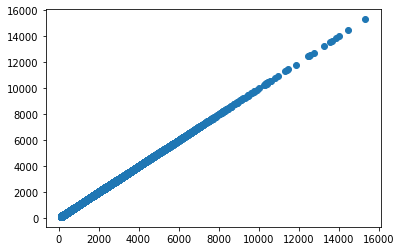

In [4]:
metric = 'duration'
y_true = all_events_df_5mins[metric]
y_pred = all_events_df_30mins[metric]
plt.scatter(y_pred, y_true)
plt.show()

### Get a version with just the 'raw' versions of the metrics

In [5]:
raw_cols = []
for col in all_events_df_5mins.columns:
    if not col.endswith('_DMC_10') and not col.endswith('dblnorm'):
        raw_cols.append(col)
        
unneeded_cols = ['gauge_num',  'start_time', 'end_time','total_precip', 'duration','peak_mean_ratio_scaled',
                'frac_q1', 'frac_q2', 'frac_q3', 'frac_q4',]       
raw_cols = [x for x in raw_cols if x not in unneeded_cols]      
        
all_events_df_5mins_raw = all_events_df_5mins[raw_cols]
all_events_df_30mins_raw = all_events_df_30mins[raw_cols]

### Check for columns containing nan (none for 5 mins)

In [6]:
columns_with_nan = all_events_df_30mins_raw.columns[all_events_df_30mins_raw.isnull().any()].tolist()
print("Columns with at least one NaN value:")
print(columns_with_nan)

this=all_events_df_30mins_raw[all_events_df_30mins_raw.isnull().any(axis=1)]
this['event_num']

Columns with at least one NaN value:
['asymm_d']


85869        0
155314     425
173950    1099
400232      52
Name: event_num, dtype: int64

### Delete column in both dataframes with the nan value

In [7]:
all_events_df_30mins_raw = all_events_df_30mins_raw[all_events_df_30mins_raw['event_num']!=302]
all_events_df_5mins_raw = all_events_df_5mins_raw[all_events_df_5mins_raw['event_num']!=302]
del all_events_df_30mins_raw['event_num']
del all_events_df_5mins_raw['event_num']

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
from scipy.stats import ks_2samp
results = []
for metric in raw_cols:
    data_5min = all_events_df_5mins[metric]
    data_30min = all_events_df_30mins[metric]
    ks_statistic, p_value = ks_2samp(data_5min, data_30min)
    results.append({"metric":metric, "KS Statistic" : ks_statistic, "p-value" : p_value})

results_df = pd.DataFrame(results)

In [10]:
raw_cols = [x for x in raw_cols if x not in 'event_num']     

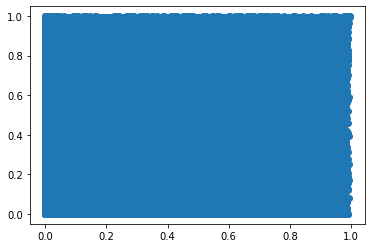

In [12]:
metric = 'peak_position_ratio'
y_true = all_events_df_5mins[metric]
y_pred = all_events_df_30mins[metric]
plt.scatter(y_pred, y_true)

In [214]:
metric = 'skewp'
y_true = all_events_df_5mins_raw[metric][:13]
y_pred = all_events_df_30mins_raw[metric][:13]
mape = mean_absolute_percentage_error(y_true, y_pred)
mape

0.3160274445315568

In [22]:
all_events_df_30mins_raw[all_events_df_30mins_raw["mean_intensity"]>200]

,I30,time_to_peak,peak_position_ratio,third_ppr,std,max_intensity,mean_intensity,min_intensity,cv,skewness,...,4th_w_peak,5th_w_peak,3rd_com,3rd_ARR,T25,T50,T75,D50,BSC,BSC_Index


In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

results = []

for metric in raw_cols:
    y_true = all_events_df_5mins_raw[metric]
    y_pred = all_events_df_30mins_raw[metric]
    
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    ks_statistic, p_value = ks_2samp(y_true, y_pred)
    
    results.append({'Metric': metric, 'mean_5mins': y_true.mean() , 'mean_30mins': y_pred.mean(),  'MAE': mae, 'MAPE': mape, 
                    'RMSE': rmse,"KS Statistic" : ks_statistic, "p-value" : p_value})

results_df = pd.DataFrame(results)

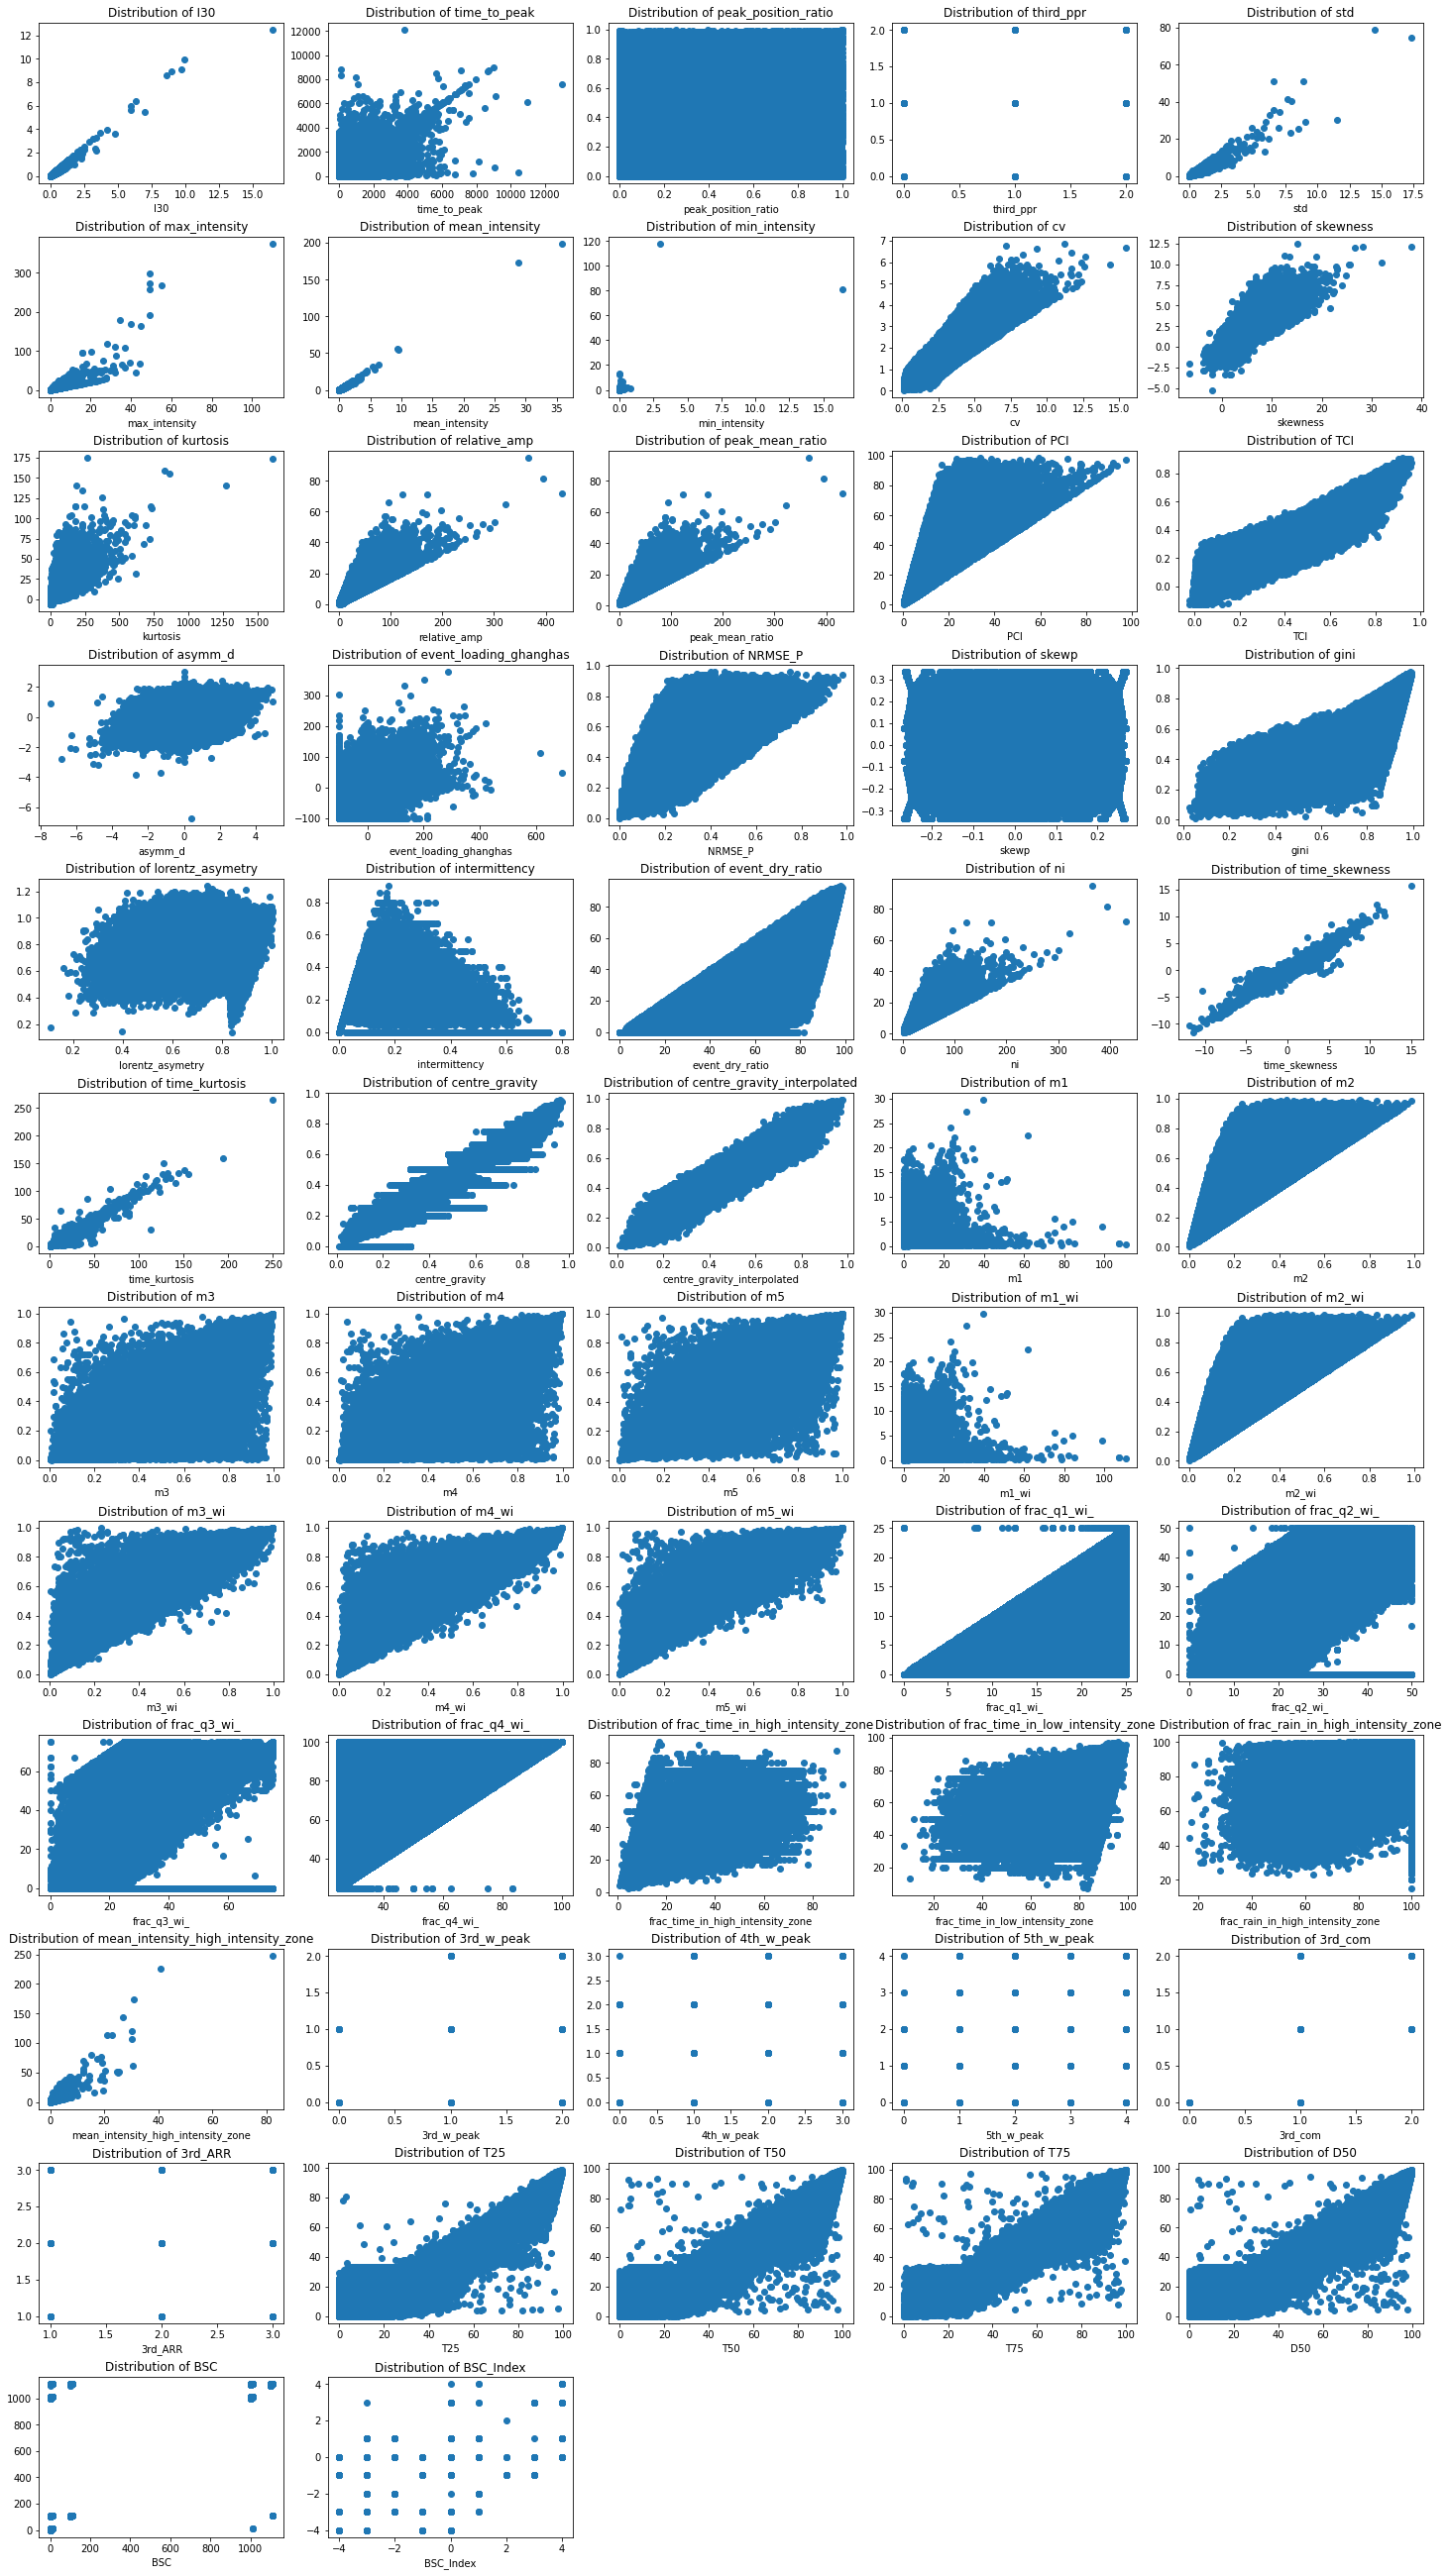

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = raw_cols # Adjust this list as needed

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(metrics) / n_cols))  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each metric and create the corresponding subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    ax.scatter(all_events_df_5mins_raw[metric], all_events_df_30mins_raw[metric])
    
    # Set the title and labels
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)

# Hide any unused subplots
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

# Display the plot
plt.show()


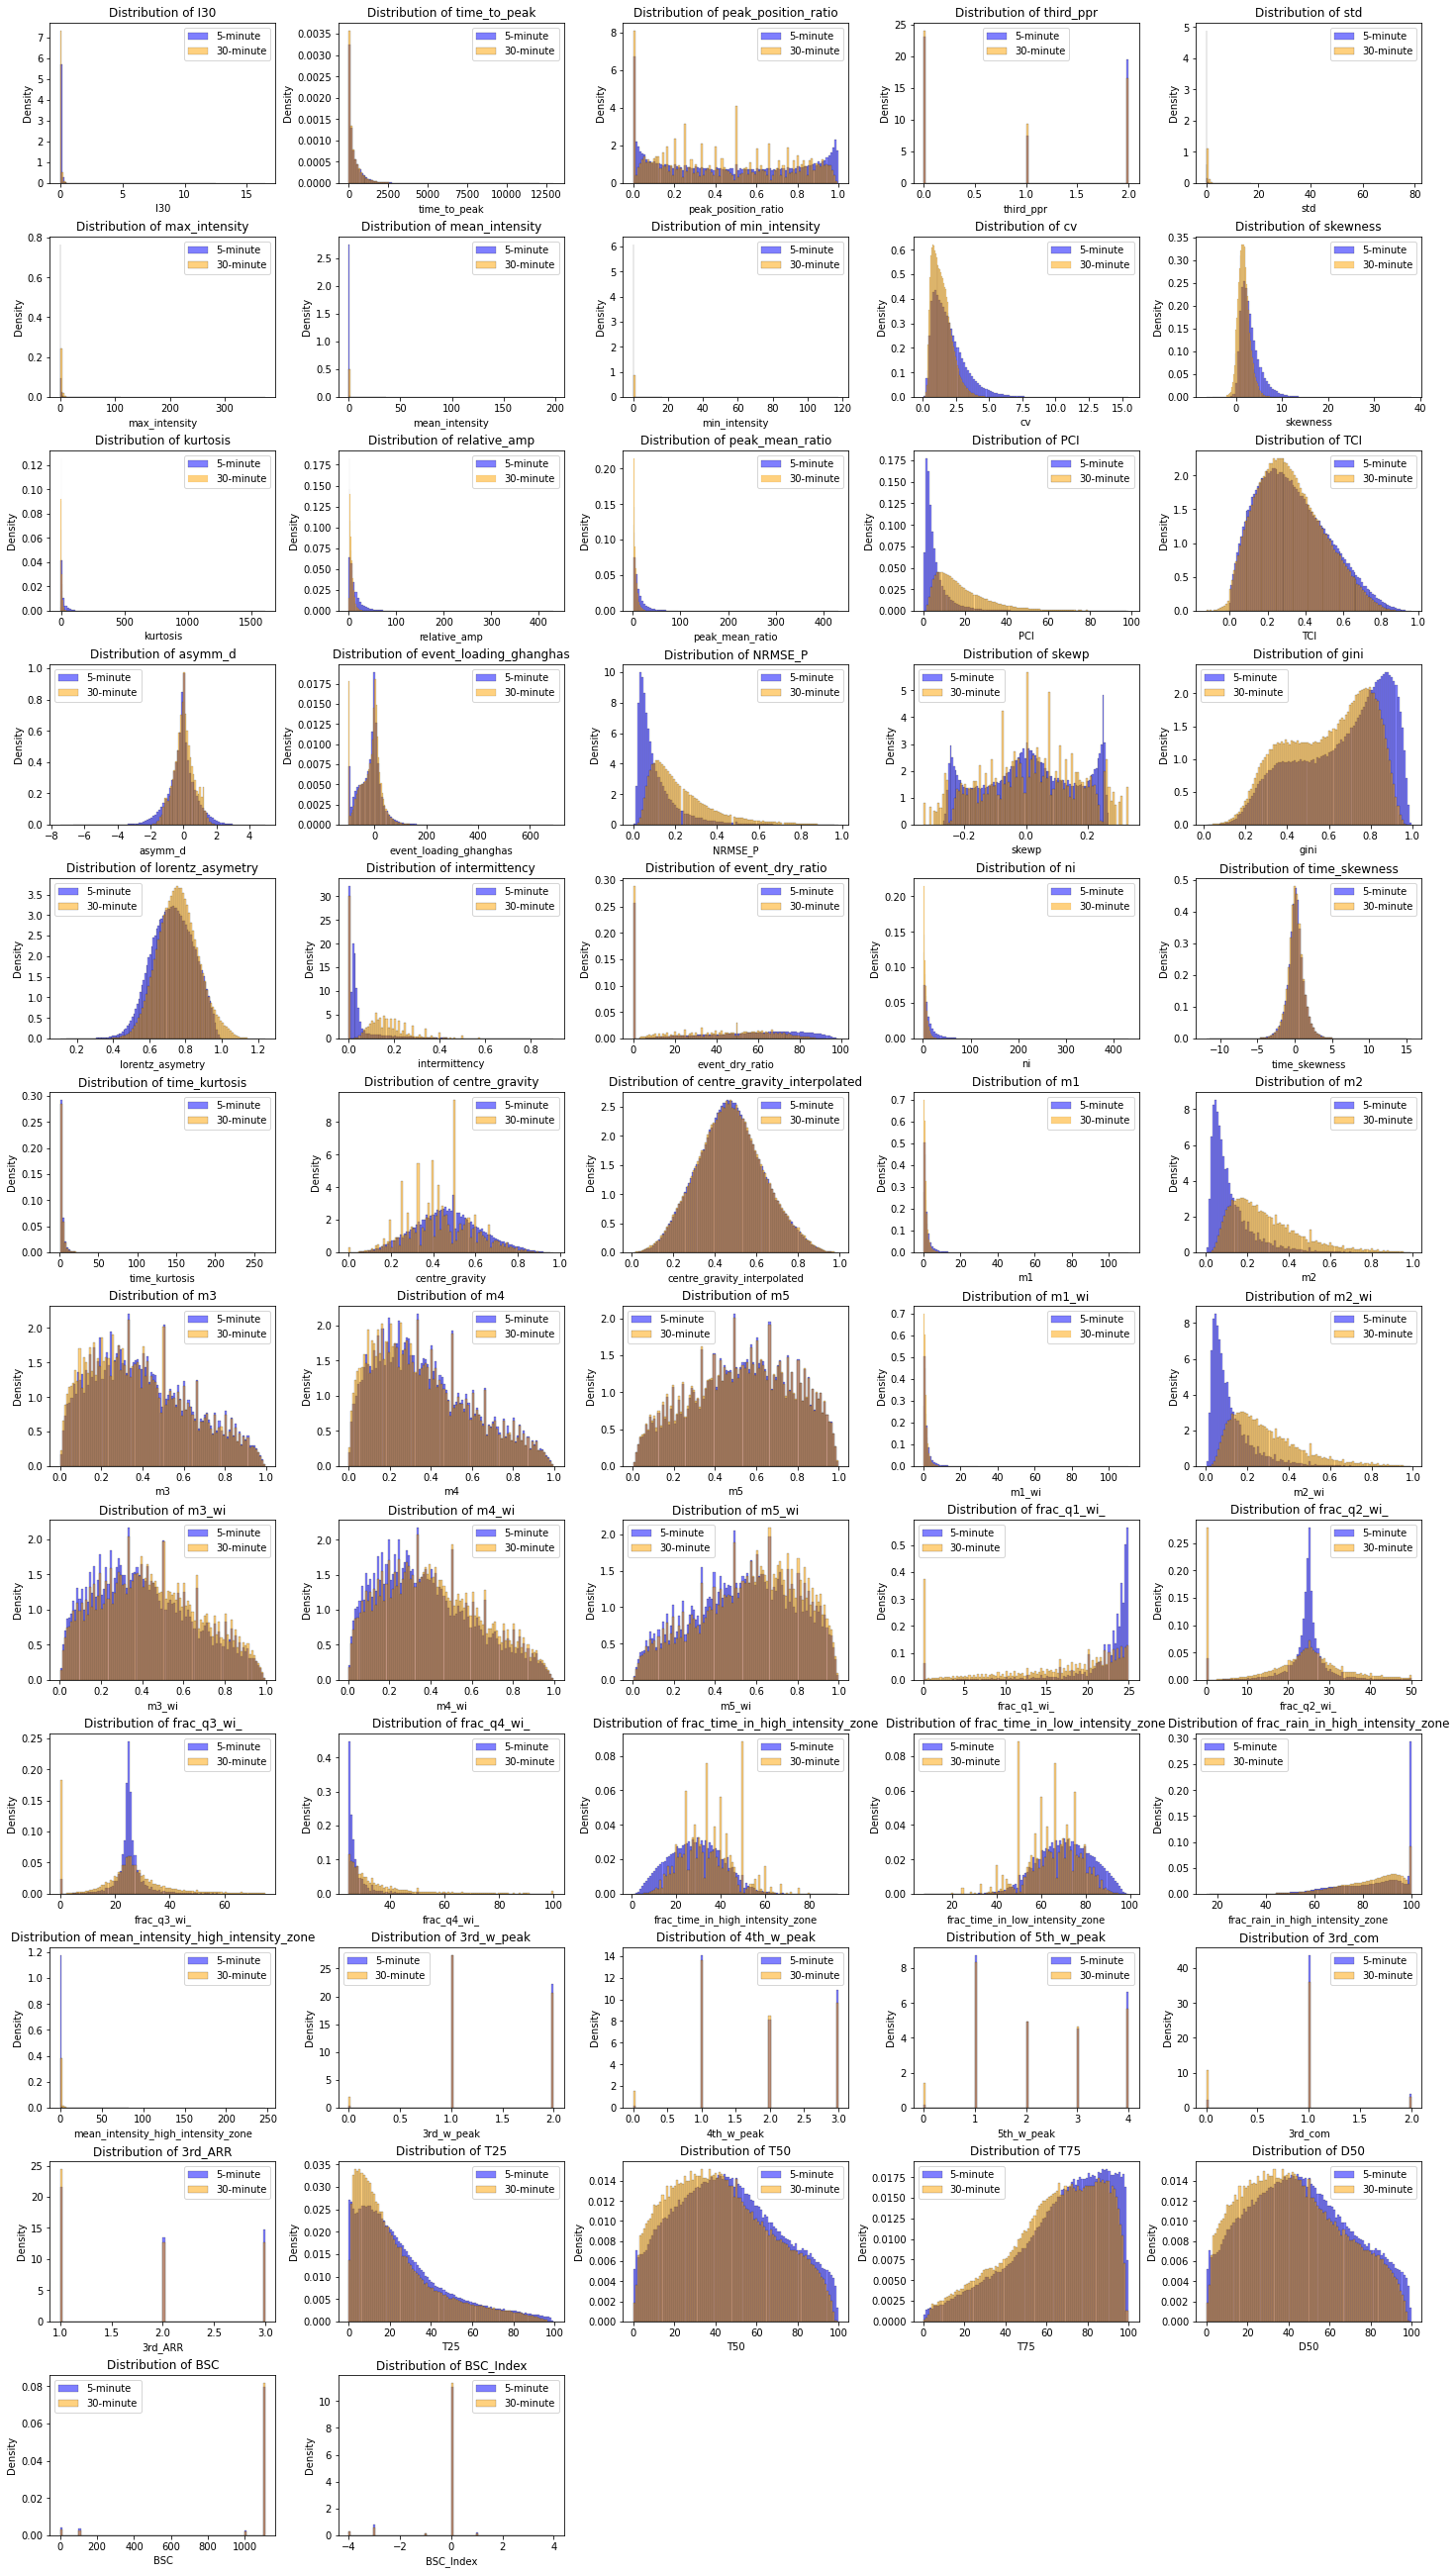

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = raw_cols # Adjust this list as needed

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(metrics) / n_cols))  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each metric and create the corresponding subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Plot the histogram for the 5-minute data
    sns.histplot(
        data=all_events_df_5mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='blue',
        label='5-minute',
        ax=ax
    )
    
    # Plot the histogram for the 30-minute data
    sns.histplot(
        data=all_events_df_30mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='orange',
        label='30-minute',
        ax=ax
    )
    
    # Set the title and labels
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Density')
    ax.legend()

# Hide any unused subplots
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

# Display the plot
plt.show()


KeyError: 'event_num'

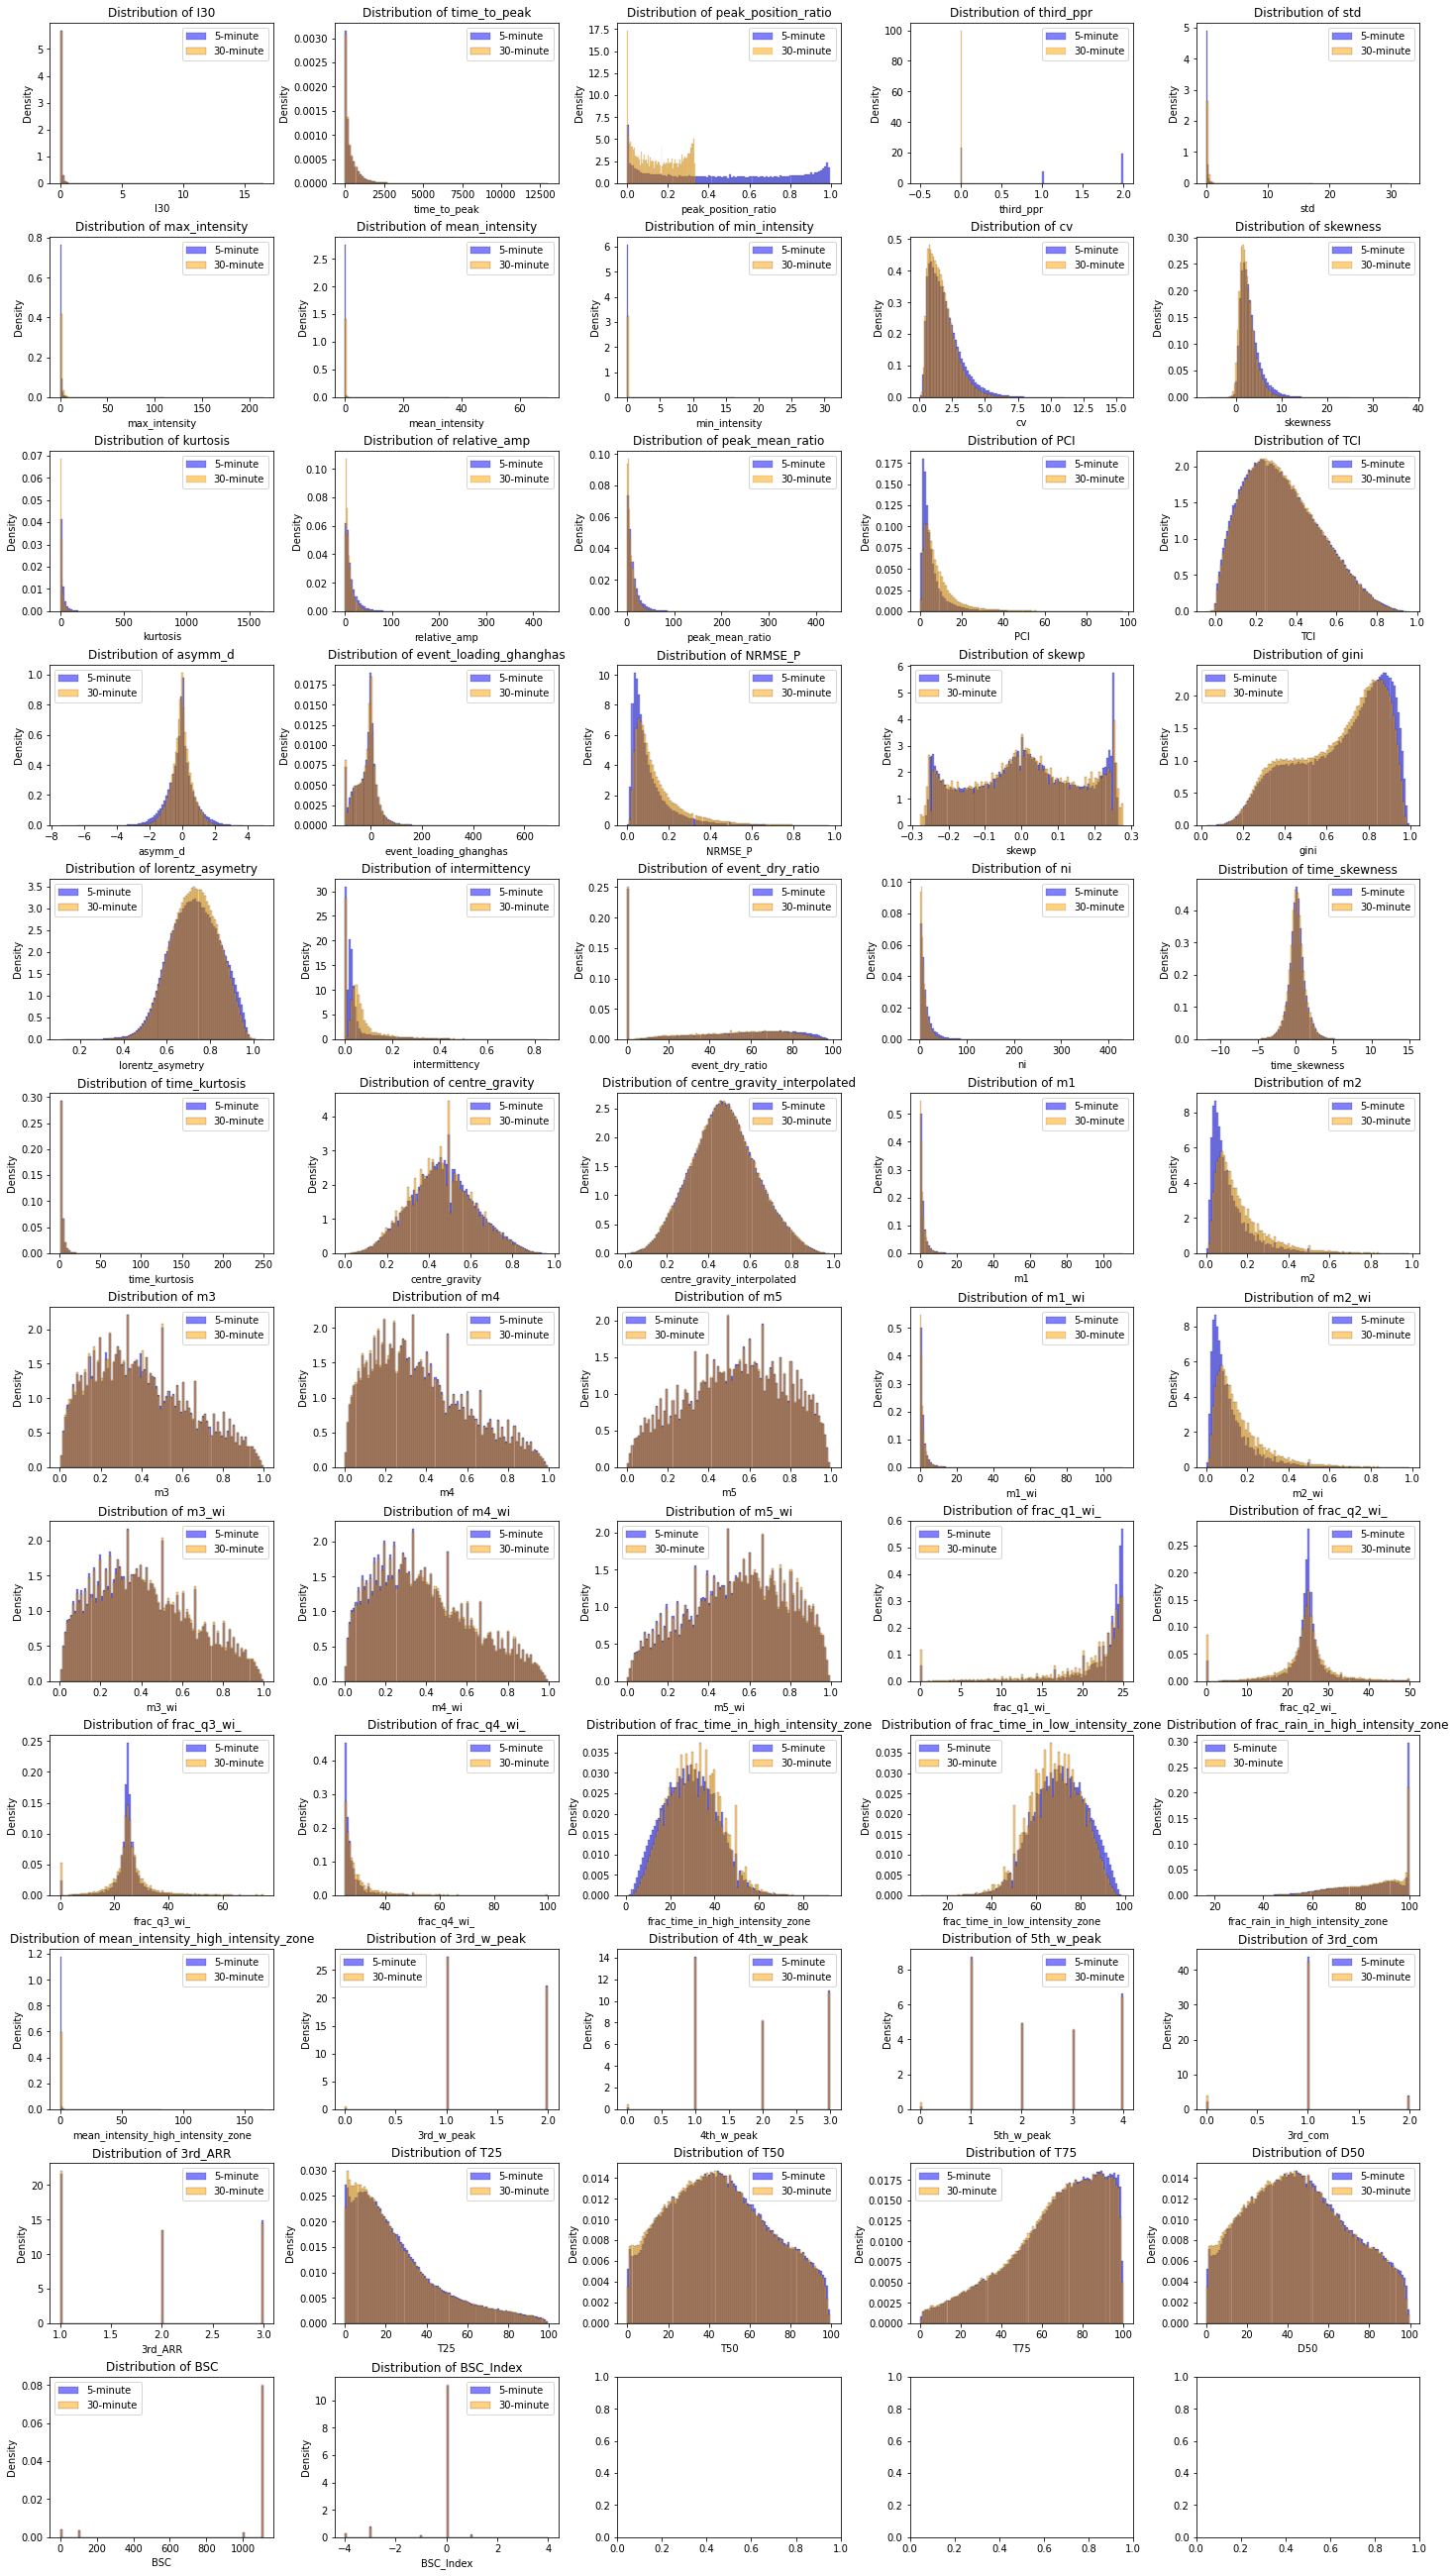

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = raw_cols # Adjust this list as needed

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(metrics) / n_cols))  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each metric and create the corresponding subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Plot the histogram for the 5-minute data
    sns.histplot(
        data=all_events_df_5mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='blue',
        label='5-minute',
        ax=ax
    )
    
    # Plot the histogram for the 30-minute data
    sns.histplot(
        data=all_events_df_30mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='orange',
        label='30-minute',
        ax=ax
    )
    
    # Set the title and labels
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Density')
    ax.legend()

# Hide any unused subplots
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

# Display the plot
plt.show()
